In [71]:
### Pyhton 3.7.1 ###
#-----L5 2-way ANOVA------
#~~packages
import pandas as pd
import scipy.stats as stats
import numpy as np
#time
import time
tStart = time.time()
#install scipy
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
#install matplotlib
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
#data visualization
import seaborn as sns
#R packages
import rpy2.robjects as robjects
#pingouin (ANOVA)
import pingouin as pi

In [72]:
df_raw = pd.read_csv(r"C:\Users\johnson_yang\Desktop\WOW_data_forStudent.csv")#改成自己的檔案位置

#~~ checking data
df = df_raw[['ID','ethnic','reading_1','reading_2','reading_3']]
print('---------------------Data info_head---------------------')
print(df.head())
print('---------------------Data type---------------------')
print(df.dtypes)
print('---------------------ID info---------------------')
df[['ID']]=df[['ID']].astype('object')
print(df.dtypes)

---------------------Data info_head---------------------
        ID  ethnic  reading_1  reading_2  reading_3
0  1041002  Human         472        478        492
1  1041007  Human         478        486        494
2  1041008  Human         500        505        523
3  1041012  Human         431        457        476
4  1041020  Human         500        502        515
---------------------Data type---------------------
ID            int64
ethnic       object
reading_1     int64
reading_2     int64
reading_3     int64
dtype: object
---------------------ID info---------------------
ID           object
ethnic       object
reading_1     int64
reading_2     int64
reading_3     int64
dtype: object


In [73]:
#~~ Descriptive stats
print(df[['reading_1']].describe())
print('---------------------------------')
print(df[['reading_2']].describe())
print('---------------------------------')
print(df[['reading_3']].describe())
print('---------------------------------')
print(df['ethnic'].value_counts())

        reading_1
count  193.000000
mean   477.264249
std     21.475461
min    393.000000
25%    467.000000
50%    481.000000
75%    489.000000
max    530.000000
---------------------------------
        reading_2
count  193.000000
mean   488.865285
std     19.109402
min    420.000000
25%    480.000000
50%    492.000000
75%    500.000000
max    537.000000
---------------------------------
        reading_3
count  193.000000
mean   499.326425
std     19.092761
min    423.000000
25%    489.000000
50%    503.000000
75%    512.000000
max    543.000000
---------------------------------
Human      87
Undead     64
Orc        42
Name: ethnic, dtype: int64


In [80]:
# ~~ melt for RM-ANOVA
MIX_data= pd.melt(df, id_vars=['ID','ethnic'], value_vars=['reading_1','reading_2','reading_3'],var_name='read_time', value_name='score')
print(MIX_data.head())
print(np.count_nonzero(MIX_data['ID']))

        ID  ethnic  read_time  score
0  1041002  Human   reading_1    472
1  1041007  Human   reading_1    478
2  1041008  Human   reading_1    500
3  1041012  Human   reading_1    431
4  1041020  Human   reading_1    500
579


In [75]:
# ~~ homogeneity
#~~ Using R's packages to run homogeneity test
rr=robjects.r
rr('MIXAOV <- read.csv("C:/Users/johnson_yang/Desktop/WOW_data_forStudent.csv",header=TRUE)')
rr('MIXAOV<-MIXAOV[c(2,3,12,17,22)]')
rr('install.packages("car")')
rr('install.packages("plyr")')
rr('install.packages("reshape2")')
rr('library(car)')
rr('library(plyr)')
rr('library(reshape2)')
rr('MIXAOV.U <- melt(MIXAOV, id.vars=c("ID","ethnic"))')
rr('colnames(MIXAOV.U)=c("MIX_id","MIX_ethnic","MIX_time","MIX_read_score")')
print(rr('bartlett.test(MIX_read_score ~ MIX_time, data=MIXAOV.U)'))
print(rr('leveneTest(MIX_read_score ~ MIX_ethnic, data=MIXAOV.U)'))




	Bartlett test of homogeneity of variances



data:  MIX_read_score by MIX_time

Bartlett's K-squared = 3.5919, df = 2, p-value = 0.166



Levene's Test for Homogeneity of Variance (center = median)

       Df F value Pr(>F)

group   2  1.3573 0.2582

      576               



In [76]:
rr('install.packages("ez")')
rr('library(ez)')
print(rr('ezANOVA(data=MIXAOV.U, dv=.(MIX_read_score), wid=.(MIX_id), within=.(MIX_time),between=.(MIX_ethnic), detailed=T,type = 3)'))


#Python

#results=pi.mixed_anova(dv='score', within='read_time', subject='ID', between='ethnic', data=MIX_data, correction='auto', remove_na=True, export_filename=None)
#with pd.option_context('display.max_rows', None, 'display.max_columns', None):
#    print(results)

$ANOVA

               Effect DFn DFd          SSn       SSd            F             p

1         (Intercept)   1 190 1.254028e+08 181893.70 1.309915e+05 1.111739e-271

2          MIX_ethnic   2 190 2.875359e+04 181893.70 1.501751e+01  8.807846e-07

3            MIX_time   2 380 4.232013e+04  17832.36 4.509121e+02 4.693290e-101

4 MIX_ethnic:MIX_time   4 380 1.728066e+02  17832.36 9.206089e-01  4.518704e-01

  p<.05          ges

1     * 0.9984098560

2     * 0.1258474799

3     * 0.1748432098

4       0.0008644701



$`Mauchly's Test for Sphericity`

               Effect         W           p p<.05

3            MIX_time 0.9312618 0.001194766     *

4 MIX_ethnic:MIX_time 0.9312618 0.001194766     *



$`Sphericity Corrections`

               Effect       GGe        p[GG] p[GG]<.05       HFe        p[HF]

3            MIX_time 0.9356828 9.368109e-95         * 0.9446484 1.239902e-95

4 MIX_ethnic:MIX_time 0.9356828 4.471951e-01           0.9446484 4.478689e-01

  p[HF]<.05

3        

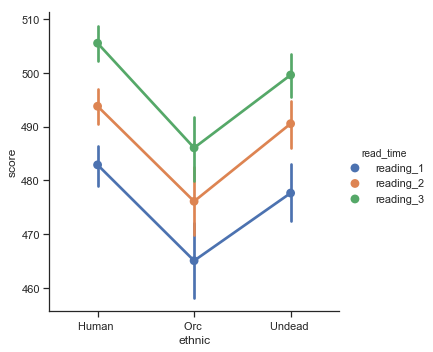

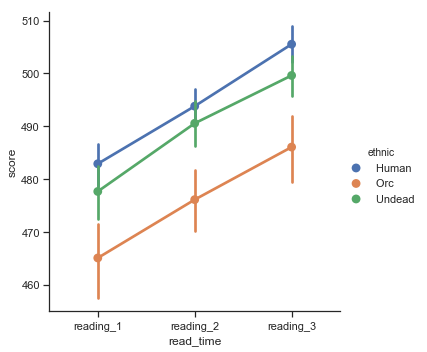

In [77]:
# plot
sns.catplot(x="ethnic", y="score", hue="read_time", kind="point", data=MIX_data)
sns.catplot(x="read_time", y="score", hue="ethnic", kind="point", data=MIX_data)
plt.show()

In [78]:
rr('install.packages("MASS")')
rr('install.packages("nlme")')
rr('install.packages("multcomp")')
rr('library(nlme)')
rr('require(multcomp)')
rr('require(MASS)')

## library & require的差別
# time
rr('pHoc_time<-lme(MIX_read_score~MIX_time,random = ~1|MIX_id/MIX_time, data = MIXAOV.U)')
print(rr('summary(multcomp::glht(pHoc_time, linfct=multcomp::mcp(MIX_time="Tukey")))'))
## namespace :: 注意

# ethnic
rr('MIX.aov.op <- aov(MIX_read_score ~ MIX_ethnic, data = MIXAOV.U)')
rr('install.packages("agricolae")')
rr('library(agricolae)')
rr('sch<-scheffe.test(MIX.aov.op,"MIX_ethnic",group = F)')
print(rr('sch$comparison'))





	 Simultaneous Tests for General Linear Hypotheses



Multiple Comparisons of Means: Tukey Contrasts





Fit: lme.formula(fixed = MIX_read_score ~ MIX_time, data = MIXAOV.U, 

    random = ~1 | MIX_id/MIX_time)



Linear Hypotheses:

                           Estimate Std. Error z value Pr(>|z|)    

reading_2 - reading_3 == 0 -10.4611     0.6971  -15.01   <2e-16 ***

reading_1 - reading_3 == 0 -22.0622     0.6971  -31.65   <2e-16 ***

reading_1 - reading_2 == 0 -11.6010     0.6971  -16.64   <2e-16 ***

---

Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Adjusted p values reported -- single-step method)



                 Difference pvalue sig          LCL       UCL

Human  - Orc      18.338807 0.0000 ***  12.82684994 23.850764

Human  - Undead    4.803341 0.0517   .  -0.02762664  9.634308

Orc  - Undead    -13.535466 0.0000 *** -19.36097055 -7.709962



In [79]:
rr('FIX.T <- split(MIXAOV.U,MIXAOV.U$MIX_time)')
rr('FIX.E <- split(MIXAOV.U,MIXAOV.U$MIX_ethnic)')

print('--------------------------------FIX.T-----------------------------------')
rr('FIX.T1.OP	<- aov(MIX_read_score ~ MIX_ethnic ,data=FIX.T$reading_1) ')
print(rr('summary(FIX.T1.OP) '))
print('---------------------------------')
rr('FIX.T2.OP	<- aov(MIX_read_score ~ MIX_ethnic ,data=FIX.T$reading_2) ')
print(rr('summary(FIX.T2.OP) '))
print('---------------------------------')
rr('FIX.T3.OP	<- aov(MIX_read_score ~ MIX_ethnic ,data=FIX.T$reading_3) ')
print(rr('summary(FIX.T3.OP) '))
print('---------------------------------')

# 11.p value
print(rr('pf(12.88, df1=2, df2=570,lower.tail=FALSE) '))
print('---------------------------------')
print(rr('pf(13.05, df1=2, df2=570,lower.tail=FALSE) '))
print('---------------------------------')
print(rr('pf(15.35, df1=2, df2=570,lower.tail=FALSE) '))

print('--------------------------------FIX.E------------------------------------')

print(rr('ezANOVA(data=FIX.E$Orc, dv=.(MIX_read_score), wid=.(MIX_id), within=.(MIX_time), detailed=TRUE) '))
print('---------------------------------')
print(rr('ezANOVA(data=FIX.E$Undead, dv=.(MIX_read_score), wid=.(MIX_id), within=.(MIX_time), detailed=TRUE) '))
print('---------------------------------')
print(rr('ezANOVA(data=FIX.E$Human, dv=.(MIX_read_score), wid=.(MIX_id), within=.(MIX_time), detailed=TRUE) '))
print('---------------------------------')

# 13.p value
print(rr('pf(98.62,   df1=2, df2=380,lower.tail=FALSE) '))
print('---------------------------------')
print(rr('pf(165.98,  df1=2, df2=380,lower.tail=FALSE) '))
print('---------------------------------')
print(rr('pf(237.38,  df1=2, df2=380,lower.tail=FALSE) '))


--------------------------------FIX.T-----------------------------------
             Df Sum Sq Mean Sq F value   Pr(>F)    

MIX_ethnic    2   9026    4513   10.78 3.67e-05 ***

Residuals   190  79523     419                     

---

Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

---------------------------------
             Df Sum Sq Mean Sq F value   Pr(>F)    

MIX_ethnic    2   9143    4571   14.25 1.72e-06 ***

Residuals   190  60970     321                     

---

Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

---------------------------------
             Df Sum Sq Mean Sq F value  Pr(>F)    

MIX_ethnic    2  10758    5379   17.25 1.3e-07 ***

Residuals   190  59233     312                    

---

Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

---------------------------------
[1] 3.380662e-06

---------------------------------
[1] 2.873321e-06

---------------------------------
[1] 3.212985e-07

----------------------